# Statistical analysis of a fracture network
Notebook example from Fracability (https://github.com/gecos-lab/FracAbility) as explained in Benedetti et al. 2024 (https://egusphere.copernicus.org/preprints/2024/egusphere-2024-2818/egusphere-2024-2818.pdf) and Casiraghi et al. 2025. (https://egusphere.copernicus.org/preprints/2025/egusphere-2025-1398/).

We only changed the input to analyse the Tsanfleuron fracture interpretation. The files were added in the path \fracability\examples\datasets\tsan.

In [1]:
from fracability.examples import data  # import the path of the sample data
from fracability import Entities, Statistics  # import the Entities class

import scipy.stats as ss
import matplotlib.pyplot as plt

## Import the Tsanfleuron fracture interpretation and calculate the topology

In [2]:
tsan_data = data.Tsan()
data_dict = tsan_data.data_dict  # Get dict of paths for the data

# Create the fractures and boundary objects. 
set_a = Entities.Fractures(shp=data_dict['EW_line.shp'], set_n=1, check_geometry=True)
set_b = Entities.Fractures(shp=data_dict['NESW_line.shp'], set_n=2, check_geometry=True)
set_c = Entities.Fractures(shp=data_dict['NS_line.shp'], set_n=3, check_geometry=True)
set_d = Entities.Fractures(shp=data_dict['NWSE_line.shp'], set_n=4, check_geometry=True)

boundary = Entities.Boundary(shp=data_dict['boundary.shp'], group_n=1, check_geometry=True)




Removing possible double points on geometries: 265/266


Checking geometries: 265/266


Removing possible double points on geometries: 281/282


Checking geometries: 281/282

Detected overlaps for set 2: [83, 88]. Check geometries in gis and fix.





Removing possible double points on geometries: 183/184


Checking geometries: 183/184


Removing possible double points on geometries: 172/173


Checking geometries: 172/173




In [3]:
fracture_net = Entities.FractureNetwork()

fracture_net.add_fractures(set_a)
#fracture_net.add_fractures(set_b)
#fracture_net.add_fractures(set_c)
#fracture_net.add_fractures(set_d)
fracture_net.add_boundaries(boundary)

fracture_net.calculate_topology()




Calculating intersections on fracture: 268/268




Invalid point for lines: [31 32 55] 

sets: [1 1 1], 

The node will be classified accordingly to the number of intersection however, the intersection must be checked!


Invalid point for lines: [ 94  97 122] 

sets: [1 1 1], 

The node will be classified accordingly to the number of intersection however, the intersection must be checked!


Invalid point for lines: [218 222 245] 

sets: [1 1 1], 

The node will be classified accordingly to the number of intersection however, the intersection must be checked!


In [4]:
fracture_net.fractures.entity_df

,id,geometry,og_line_id,type,censored,f_set,length,b_group
0,1,"LINESTRING (2583395.110 1128856.693, 2583418.9...",1,fracture,1,1,223.1519,-9999
1,1,"LINESTRING (2583535.257 1128791.870, 2583592.1...",2,fracture,1,1,1079.1007,-9999
2,1,"LINESTRING (2584593.590 1128982.370, 2584626.3...",3,fracture,0,1,670.5768,-9999
3,1,"LINESTRING (2583631.251 1128854.047, 2583673.5...",4,fracture,0,1,216.5848,-9999
4,1,"LINESTRING (2583673.585 1128850.741, 2583733.3...",5,fracture,0,1,140.7322,-9999
...,...,...,...,...,...,...,...,...
261,1,"LINESTRING (2583831.968 1129014.317, 2583871.9...",262,fracture,0,1,166.5978,-9999
262,1,"LINESTRING (2583825.637 1129143.766, 2583766.0...",263,fracture,0,1,83.5000,-9999
263,1,"LINESTRING (2583901.338 1129244.918, 2584004.1...",264,fracture,0,1,157.3729,-9999
264,1,"LINESTRING (2584055.127 1129215.152, 2584055.1...",265,fracture,0,1,42.0688,-9999


## NetworkFitter 

The network fitter class is responsible of running the statistical analysis on the fracture network. There are different options:
1. use_survival: Boolean flag to use survival (True) or treat the data as if there were no censoring (False). Default is True. 
2. complete_only: Boolean flag to use only complete measurements (True) or all the dataset (False). This flag is used only when use_survival is False. Default is False.
3. use_AIC: Boolean flag to use AIC (true) or AICc (false) for model selection. Default is True


These options are useful to compare different ways of fitting the data with survival analysis however we strongly suggest to always use survival analysis since in case of no censoring the final results will be the same as the other methods.

In [5]:
fitter = Statistics.NetworkFitter(fracture_net)

### Fit different distributions

All the rv_continous distribution present in scipy are valid (https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions).

Each time a fit is run the Akaike, Kolmogorov-Smirnov, Koziol and Green and Anderson Darling distances are calculated and saved.

In [6]:
fitter.fit('lognorm')
fitter.fit('expon')
fitter.fit('norm')
fitter.fit('gengamma')
fitter.fit('powerlaw')
fitter.fit('weibull_min')

Fitting lognorm on data
Fitting expon on data
Fitting norm on data
Fitting gengamma on data
Fitting powerlaw on data
Fitting weibull_min on data


### Show the model rank table

In [7]:
fitter.fit_records(sort_by='Akaike').iloc[:,:-1] # the iloc is to remove the last column that is not useful in this case

,name,Akaike,delta_i,w_i,max_log_likelihood,KS_distance,KG_distance,AD_distance,Akaike_rank,KS_rank,KG_rank,AD_rank,Mean_rank
0,lognorm,3019.809879,0.0,0.99631,-1507.90494,0.029812,0.032839,0.263847,1,1,1,1,1.0
1,gengamma,3031.006013,11.196133,0.00369,-1512.503006,0.059295,0.229396,1.453621,2,2,2,2,2.0
2,weibull_min,3052.470975,32.661096,0.0,-1524.235488,0.063222,0.348145,2.764805,3,3,3,3,3.0
3,expon,3080.088431,60.278551,0.0,-1539.044215,0.134347,1.231412,8.249792,4,4,4,4,4.0
4,norm,3203.465979,183.656099,0.0,-1599.732989,0.139228,2.056734,13.902216,5,5,5,5,5.0
5,powerlaw,3231.773327,211.963448,0.0,-1613.886664,0.292353,7.486016,36.572769,6,6,6,6,6.0


### Plot the different models using PITsummary plots

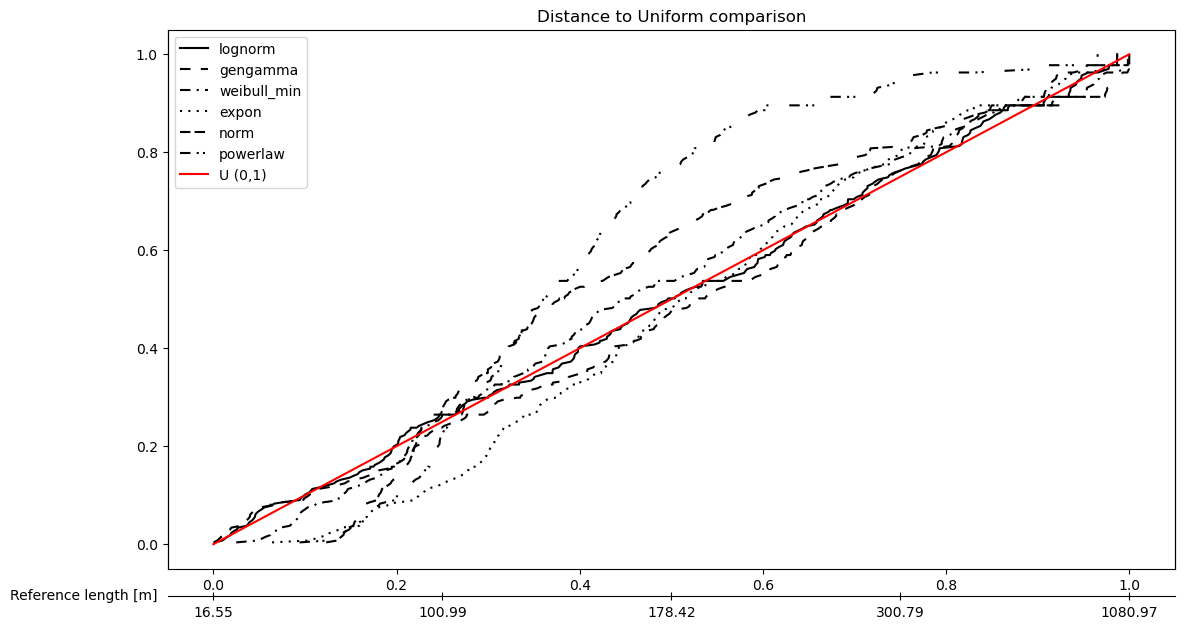

In [8]:
# Plot all the models
fitter.plot_PIT(sort_by='Akaike', bw=True) 

### Plot summary plots

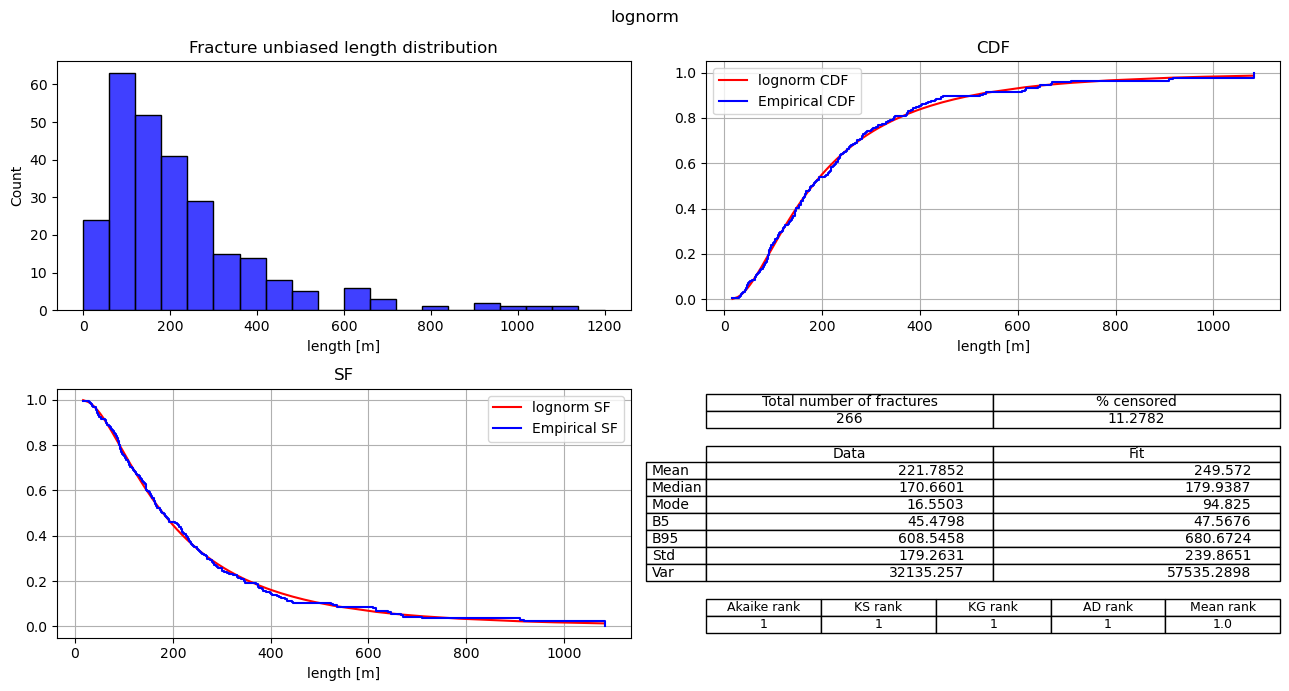

In [10]:
# Plot specific model
fitter.plot_summary(position=[1], sort_by='Mean_rank')

### Export the fit_records table

The fit_records table can also be saved as csv, excel or directly to clipboard in a excel friendly format 

In [11]:
#fitter.fit_result_to_excel('all_export.xlsx')
#fitter.fit_result_to_clipboard()